# Lets-Plot in 2024

In [1]:
from datetime import datetime

import numpy as np
import pandas as pd

from lets_plot import *
from lets_plot.bistro import *
from lets_plot.geo_data import *

The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).



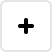
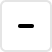
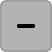
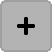
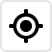
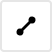
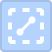
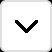
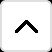
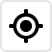
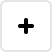
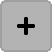
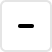
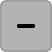
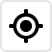
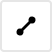
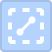
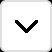
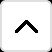
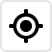

In [2]:
LetsPlot.setup_html()
LetsPlot.set_theme(theme(plot_title=element_text(face='bold')))

In [3]:
DATA_ROOT_DIR = "../../../data/lp2024"

## Get data

In [4]:
authors_from_bar = ["Ivan Kupriyanov", "Artem Smirnov", "Valentin Dovidaytis", "Rashid Yangazov"]
ext_replaces = {"kt": "kotlin", "py": "python", "ipynb": "demo", "csv": "demo"}
commits_df = pd.read_csv("{0}/generated/commits.csv".format(DATA_ROOT_DIR), sep=";", parse_dates=["date"])
commits_df["deletions_neg"] = -commits_df["deletions"]
commits_df["author_city"] = np.where(commits_df["author"].isin(authors_from_bar), "Bar", "Other")
commits_df["file_kind"] = commits_df["extension"].map(ext_replaces).fillna("other")
print(commits_df.shape)
commits_df.head()

(1537, 10)


hash  repo_name               author  \
0  27fd1bba42290374415c80e7b85a23479617e621  lets-plot  Valentin Dovidaytis   
1  471d5a62377a3dbf92859a28b0d6e1598cb8646e  lets-plot  Valentin Dovidaytis   
2  8f20cf850a0a02c0c7b707fd45667e64402156d3  lets-plot      Ivan Kupriyanov   
3  8f20cf850a0a02c0c7b707fd45667e64402156d3  lets-plot      Ivan Kupriyanov   
4  325ae3b2ba27dcaeeb33364f2f537ec3f5ca0a96  lets-plot      Ivan Kupriyanov   

                        date extension  additions  deletions  deletions_neg  \
0  2024-12-26 12:12:18+01:00       kts      104.0      185.0         -185.0   
1  2024-12-24 16:21:31+01:00       kts       87.0       18.0          -18.0   
2  2024-12-23 21:17:01+01:00       kts       40.0       50.0          -50.0   
3  2024-12-23 21:17:01+01:00        kt        1.0       11.0          -11.0   
4  2024-12-23 19:45:12+01:00       kts        8.0        0.0           -0.0   

  author_city file_kind  
0         Bar     other  
1         Bar     other  
2         Bar     other  
3         Bar    kotlin  
4         Bar     other

In [5]:
files_df = pd.read_csv("{0}/generated/files.csv".format(DATA_ROOT_DIR))
print(files_df.shape)
files_df.head()

(1864, 6)


repo_name                                          file_path  \
0  lets-plot            docs/dev/notebooks/coord_polar_wind.csv   
1  lets-plot         docs/dev/notebooks/interactive_tools.ipynb   
2  lets-plot                 docs/dev/notebooks/waterfall.ipynb   
3  lets-plot               docs/dev/notebooks/coord_polar.ipynb   
4  lets-plot  plot-stem/src/commonMain/kotlin/org/jetbrains/...   

                 file_name extension  additions  deletions  
0     coord_polar_wind.csv       csv  1147261.0        0.0  
1  interactive_tools.ipynb     ipynb    28830.0      724.0  
2          waterfall.ipynb     ipynb    22593.0     6894.0  
3        coord_polar.ipynb     ipynb    17072.0    11793.0  
4        SeattleWeather.kt        kt    11701.0        0.0

In [6]:
releases_df = pd.read_csv("{0}/original/releases.csv".format(DATA_ROOT_DIR), parse_dates=["date"])
releases_df["total"] = releases_df["added"] + releases_df["changed"] + releases_df["fixed"]
releases_df = releases_df.sort_values(by=["repo_name", "date"]).reset_index(drop=True)
print(releases_df.shape)
releases_df.head()

(25, 11)


hash  repo_name version release_kind  \
0  523aeb73c2b733839070b14b29af60e638b77f5b  lets-plot   4.2.0        minor   
1  09484c78d9c9873598bd24afde294d1180afc59a  lets-plot   4.3.0        minor   
2  a3233e9cdbe6b8474a90d7443c20564de16e3cfb  lets-plot   4.3.1        patch   
3  de1b96cc5120485112a6f6457f6351e5e0131fed  lets-plot   4.3.2        patch   
4  0f28341f1daf1bc8c263f2412894b6e8e4d3e73e  lets-plot   4.3.3        patch   

                        date  added  changed  fixed  \
0  2023-12-28 14:09:55+01:00     12        2     11   
1  2024-03-07 17:57:33+01:00      6        2     14   
2  2024-04-16 16:09:51+02:00      7        0     25   
3  2024-04-25 16:48:41+02:00      0        1      4   
4  2024-05-29 18:14:19+02:00      1        1      5   

                                           repo_link  \
0  https://github.com/JetBrains/lets-plot/release...   
1  https://github.com/JetBrains/lets-plot/release...   
2  https://github.com/JetBrains/lets-plot/release...   
3  https://github.com/JetBrains/lets-plot/release...   
4  https://github.com/JetBrains/lets-plot/release...   

                                           demo_link  total  
0  https://nbviewer.org/github/JetBrains/lets-plo...     25  
1  https://nbviewer.org/github/JetBrains/lets-plo...     22  
2  https://nbviewer.org/github/JetBrains/lets-plo...     32  
3  https://nbviewer.org/github/JetBrains/lets-plo...      5  
4  https://nbviewer.org/github/JetBrains/lets-plo...      7

In [7]:
issues_df = pd.read_csv("{0}/generated/issues.csv".format(DATA_ROOT_DIR), sep=";", encoding_errors='replace', \
                        parse_dates=["created_at", "closed_at"])
issues_df = issues_df.sort_values(by=["repo_name", "number"]).reset_index(drop=True)
print(issues_df.shape)
issues_df.head()

(769, 8)


number   state            author  \
0      11  CLOSED  Igor Alshannikov   
1      49  CLOSED  Igor Alshannikov   
2      50  CLOSED  Igor Alshannikov   
3      51  CLOSED  Igor Alshannikov   
4      52  CLOSED  Igor Alshannikov   

                                               title  \
0             style class `plt-tooltip` is never set   
1      BoxPlotSceneMapper demo: error on mouse hover   
2  BarPlotSceneMapper demo: tooltip should appear...   
3                                  Implement GGBunch   
4                         Implement guides function    

                 created_at  closed                 closed_at  repo_name  
0 2019-08-07 21:14:10+00:00    True 2019-08-19 12:14:47+00:00  lets-plot  
1 2019-10-29 20:57:39+00:00    True 2019-10-31 06:43:16+00:00  lets-plot  
2 2019-10-29 21:55:24+00:00    True 2019-10-30 21:43:22+00:00  lets-plot  
3 2019-10-30 23:02:27+00:00    True 2020-01-27 16:04:08+00:00  lets-plot  
4 2019-11-01 17:14:49+00:00    True 2021-03-17 13:41:21+00:00  lets-plot

In [8]:
lpd_performance_countries_df = pd.read_csv("{0}/original/lpd_performance/Countries.csv".format(DATA_ROOT_DIR))
lpd_performance_countries_df["CTR"] = lpd_performance_countries_df["CTR"].str.replace("%", "").astype(float)
print(lpd_performance_countries_df.shape)
lpd_performance_countries_df.head()

(225, 5)


Country  Clicks  Impressions   CTR  Position
0   United States    4531       165681  2.73     15.63
1         Germany    1385        35946  3.85     11.95
2  United Kingdom    1248        31753  3.93     14.36
3          Russia     526        10099  5.21     24.63
4          France     420        22315  1.88     12.55

In [9]:
resolution = 3
countries_gdf = geocode_countries(lpd_performance_countries_df["Country"]).ignore_not_found().get_boundaries(resolution)
print(countries_gdf.shape)
countries_gdf.head()

(192, 3)


country      found name  \
0   United States   United States   
1         Germany         Germany   
2  United Kingdom  United Kingdom   
3          Russia          Russia   
4          France          France   

                                            geometry  
0  MULTIPOLYGON (((-178.12091 51.67737, -177.9618...  
1  MULTIPOLYGON (((13.16065 54.55901, 13.28192 54...  
2  MULTIPOLYGON (((-7.32468 57.67791, -7.06259 57...  
3  MULTIPOLYGON (((-179.07499 71.59623, -179.3849...  
4  MULTIPOLYGON (((-151.35269 -16.84600, -151.449...

In [10]:
lpd_performance_dates_df = pd.read_csv("{0}/original/lpd_performance/Dates.csv".format(DATA_ROOT_DIR), parse_dates=["Date"])
lpd_performance_dates_df["CTR"] = lpd_performance_dates_df["CTR"].str.replace("%", "").astype(float)
print(lpd_performance_dates_df.shape)
lpd_performance_dates_df.head()

(339, 5)


Date  Clicks  Impressions   CTR  Position
0 2024-12-18      75         2579  2.91     11.23
1 2024-12-17      59         2775  2.13     10.81
2 2024-12-16     106         2978  3.56     11.35
3 2024-12-15      24         1437  1.67     14.05
4 2024-12-14      19         1091  1.74     15.61

In [11]:
lpd_performance_pages_df = pd.read_csv("{0}/original/lpd_performance/Pages.csv".format(DATA_ROOT_DIR))
lpd_performance_pages_df["CTR"] = lpd_performance_pages_df["CTR"].str.replace("%", "").astype(float)
print(lpd_performance_pages_df.shape)
lpd_performance_pages_df.head()

(873, 5)


Top pages  Clicks  Impressions  \
0                             https://lets-plot.org/    3696        45001   
1            https://lets-plot.org/pages/charts.html    1202        24334   
2        https://lets-plot.org/python/pages/api.html     690        34801   
3     https://lets-plot.org/python/pages/charts.html     440        10262   
4  https://lets-plot.org/python/pages/api/lets_pl...     267         2980   

    CTR  Position  
0  8.21     36.95  
1  4.94     21.14  
2  1.98     22.85  
3  4.29     24.11  
4  8.96     22.80

In [12]:
lpd_performance_queries_df = pd.read_csv("{0}/original/lpd_performance/Queries.csv".format(DATA_ROOT_DIR))
lpd_performance_queries_df["CTR"] = lpd_performance_queries_df["CTR"].str.replace("%", "").astype(float)
print(lpd_performance_queries_df.shape)
lpd_performance_queries_df.head()

(1000, 5)


Top queries  Clicks  Impressions    CTR  Position
0         lets plot     700         1230  56.91      1.00
1          letsplot     487          902  53.99      1.00
2         lets-plot     476          984  48.37      1.00
3  lets plot python     305          476  64.08      1.01
4         lets_plot     122          196  62.24      1.00

## Plots: repositories

In [13]:
def get_release_tooltip():
    return layer_tooltips()\
           .title("<a href=\"@repo_link\">@repo_name v@version (@release_kind)</a>")\
           .line("release date|@date").format("@date", "%d %b, %l:%M %p")\
           .line("total number of updates\n= added features + changes + fixes|@total = @added + @changed + @fixed")\
           .line("demo notebooks|<a href=\"@demo_link\">NBViewer</a>")

In [14]:
def get_commits_tooltip(kind):
    return layer_tooltips().title("@..count.. {0}".format(kind))\
                           .line("@|@file_kind")\
                           .line("date|@date").format("@date", "%d %b")

background_data = {
    'ymin': [-3_000, 0, 3_000],
    'ymax': [0, 3_000, 3_500],
    'area_kind': ["deletions", "additions", "releases"],
}
background_labels_data = {
    'x': [datetime(2024, 12, 15)] * 2,
    'y': [-2_000, 2_000],
    'label': ["Deletions", "Additions"],
}

area_colors = {
    "additions": "#b2df8a",
    "deletions": "#fb9a99",
    "releases": "black",
}
file_colors = {
    "kotlin": "#af1df5",
    "python": "#306998",
    "other": "gray",
}
release_colors = {
    "major": "#f03b20",
    "minor": "#fd8d3c",
    "patch": "#ffffb2",
}

release_shapes = {
    "lets-plot": 22,
    "lets-plot-kotlin": 23,
    "lets-plot-skia": 21
}

commits_filtered_df = commits_df[commits_df["file_kind"] != "demo"]

ggplot() + \
    geom_band(aes(ymin='ymin', ymax='ymax', paint_a='area_kind'), \
              data=background_data, size=0, alpha=.75, fill_by="paint_a", tooltips='none') + \
    geom_histogram(aes(x="date", y="..count..", weight="additions", paint_b="file_kind"), \
                   data=commits_filtered_df, bins=61, boundary=datetime(2024, 1, 1), fill_by="paint_b", \
                   tooltips=get_commits_tooltip("additions")) + \
    geom_histogram(aes(x="date", y="..count..", weight="deletions_neg", paint_b="file_kind"), \
                   data=commits_filtered_df, bins=61, boundary=datetime(2024, 1, 1), fill_by="paint_b", \
                   tooltips=get_commits_tooltip("deletions")) + \
    geom_text(aes('x', 'y', label='label'), data=background_labels_data) + \
    geom_point(aes(x="date", size="total", paint_c="release_kind", shape="repo_name"), \
               y=3_250, data=releases_df, fill_by="paint_c",
               tooltips=get_release_tooltip()) + \
    coord_polar(ylim=[-3_000, 3_500]) + \
    scale_x_datetime(breaks=[datetime(2024, month, 2) for month in range(1, 13)], \
                     limits=[datetime(2024, 1, 1), datetime(2024, 12, 31)], expand=[0, 0], format="%b") + \
    scale_y_continuous(expand=[0, 0]) + \
    scale_manual("paint_a", values=area_colors, guide='none') + \
    scale_manual("paint_b", name="file type", values=file_colors) + \
    scale_manual("paint_c", name="release kind", values=release_colors, \
                 guide=guide_legend(override_aes={"shape": 21})) + \
    scale_size(range=[3, 9], guide='none') + \
    scale_shape_manual(name="repository", values=release_shapes) + \
    ggsize(1000, 800) + \
    ggtitle("Commits in 2024") + \
    theme(axis_line_x='blank', axis_ticks_x='blank', axis_title_x='blank',
          axis_text_y='blank', axis_title_y='blank',
          panel_grid_major_x=element_line(color='gray'),
          panel_grid_major_y='blank')

In 2024, the highest surge in Kotlin code-writing occurred in late September.
The biggest updates in Python came in the middle of summer.

In [15]:
def get_waterfall_data():
    df = commits_df[commits_df["file_kind"] != "demo"].sort_values(by="date").reset_index(drop=True)
    date_series = pd.to_datetime(df["date"], utc=True)
    df["month_number"] = date_series.dt.month
    df["month"] = date_series.dt.month_name()
    grouped_df = df.groupby(["month_number", "month"]).agg({"additions": ["sum"], "deletions_neg": ["sum"]})
    grouped_df.columns = ["additions", "deletions"]
    melted_df = pd.melt(
        grouped_df.reset_index(),
        id_vars=["month_number", "month"],
        value_vars=["additions", "deletions"],
        var_name="changes_type",
        value_name="changes_size",
    )
    return melted_df.sort_values(by=["month_number", "changes_type"]).reset_index(drop=True)

waterfall_df = get_waterfall_data()

breaks = [i + .5 for i in range(0, 23, 2)] + [24]
labels = list(waterfall_df["month"].unique()) + ["Total"]

waterfall_plot(get_waterfall_data(), "month", "changes_size", \
               label='blank', show_legend=True, size=.75, width=.75,
               absolute_tooltips=layer_tooltips()
                                .title("@..xlabel..")
                                .line("@..dy..")
                                .disable_splitting(),
               relative_tooltips=layer_tooltips()
                                .title("@..xlabel..")
                                .line("@..dy..")
                                .disable_splitting()) + \
    scale_x_continuous(name="Month", breaks=breaks, labels=labels) + \
    scale_fill_discrete(name="", labels={"Increase": "additions", "Decrease": "deletions"},
                        guide=guide_legend(override_aes={'size': 0})) + \
    ylab("Changes") + \
    ggsize(1000, 800) + \
    ggtitle("Total additions and deletions by month in all repositories")

Throughout the year, despite some deletions, the amount of code has steadily increased, especially in the fall.

In [16]:
def get_issues_data():
    actual_issues_df = issues_df[(issues_df["created_at"].dt.year == 2024)|(issues_df["closed_at"].dt.year == 2024)].reset_index(drop=True)
    actual_issues_df["duration"] = (actual_issues_df["closed_at"] - actual_issues_df["created_at"]).dt.days
    closed_actual_issues_df = actual_issues_df[actual_issues_df["closed"]].reset_index(drop=True)
    return (actual_issues_df, closed_actual_issues_df)

def get_issue_tooltip():
    return layer_tooltips().title("@repo_name\nIssue <a href=\"https://github.com/JetBrains/lets-plot/issues/@number\">#@number</a>").format("@number", "d")\
                           .line("@title")\
                           .line("author|@author")\
                           .line("created|@created_at").format("@created_at", "%Y-%m-%d, %l:%M %p")\
                           .line("closed|@closed_at").format("@closed_at", "%Y-%m-%d, %l:%M %p")\
                           .line("duration (days)|@duration").format("@duration", ".2~s")

actual_issues_df, closed_actual_issues_df = get_issues_data()

ggplot() + \
    geom_point(aes("created_at", y=as_discrete("number", order_by="created_at", order=1), shape="repo_name", paint_a="closed"), \
               data=actual_issues_df, size=2, fill_by="paint_a", tooltips=get_issue_tooltip()) + \
    geom_segment(aes(x="created_at", xend="closed_at", y="number", yend="number", paint_b="duration"), \
                 data=closed_actual_issues_df, arrow=arrow(angle=10), color_by="paint_b", \
                 tooltips=get_issue_tooltip()) + \
    scale_x_datetime(name="", breaks=[datetime(2024, month, 2) for month in range(1, 13)], format="%b") + \
    scale_y_continuous(format="#{d}") + \
    scale_manual("paint_a", name="issue is closed", values={True: "#4daf4a", False: "#e41a1c"}, \
                 guide=guide_legend(override_aes={'shape': 21})) + \
    scale_continuous("paint_b", name="duration (days)", low="#00441b", high="#c7e9c0") + \
    scale_shape_manual(name="repository", values=release_shapes) + \
    coord_cartesian(xlim=[datetime(2024, 1, 1), datetime(2024, 12, 31)]) + \
    theme(legend_position='bottom') + \
    ggtitle("Issues of 2024", "[Interactive plot]") + \
    ggsize(1000, 800) + \
    theme(axis_title_y='blank', axis_text_y='blank') + \
    ggtb()

A significant number of issues were resolved this year, including some longstanding ones.

**Note** that the plot above is interactive. Use the toolbox to zoom in and see more detail.

In [17]:
def get_files_top_data(top_size):
    df = files_df[files_df["extension"] == "kt"].copy()
    df["changes"] = df["additions"] + df["deletions"]
    df["deletions"] = -df["deletions"]
    df = df.sort_values(by="changes", ascending=False)
    filtered_df = df[
        (~df["extension"].isin(["csv", "ipynb"]))&
        (~df["file_path"].str.startswith("demo"))&
        (~df["file_path"].str.startswith("plot-stem"))&
        (~df["file_path"].str.endswith("Test.kt"))
    ]
    top_df = filtered_df.iloc[:top_size].reset_index(drop=True)
    top_df["full_path"] = top_df["repo_name"] + top_df["file_path"]
    return pd.melt(top_df,
                   id_vars=["repo_name", "full_path", "file_path", "file_name"],
                   value_vars=["additions", "deletions"],
                   var_name="change_type", value_name="change_size")

top_size = 20
files_top_df = get_files_top_data(top_size)
files_top_labels = files_top_df[["full_path", "file_name"]].set_index("full_path")["file_name"].to_dict()

ggplot(files_top_df, aes("full_path", "change_size", fill="change_type")) + \
    geom_bar(stat='identity', tooltips=layer_tooltips().title("@file_name")\
                                                       .line("changes|@change_size @change_type")\
                                                       .line("repository|@repo_name")\
                                                       .line("file path|@file_path")) + \
    geom_point(aes(shape="repo_name"), y=0, fill="white") + \
    scale_x_discrete(name="", labels=files_top_labels) + \
    scale_fill_manual(name="", values={"additions": "#4daf4a", "deletions": "#e41a1c"}) + \
    scale_shape_manual(name="repository", values=release_shapes) + \
    ylab("changes") + \
    ggsize(1000, 700) + \
    ggtitle("Top {0} files by number of changes per year".format(top_size))

Judging by the most heavily edited Kotlin files, 2024's features such as the **polar coordinate system**, **interactivity**, and **number formatting** caused the most changes in the code.

## Plots: documentation site

All the plots in this section come from Google Search Console statistics.
These statistics show how well the documentation site is doing.

Here's a description of the data columns used:

- `Impressions` are the total number of times your site’s link is shown in Google Search results. They reflect how visible your pages are to potential visitors: more impressions usually mean higher potential reach. Having a consistently growing number of impressions suggests increasing brand or content visibility.

- `Clicks` indicate how many times users actually clicked through to your site from Google Search results. A higher click count generally means your site titles and snippets resonate with user intent. Working on relevant keywords and enticing descriptions can help you increase clicks.

- (Average) `Position` shows your page’s typical ranking in search results, with 1 being the very top. The closer your average position is to 1, the more likely you are to attract clicks and traffic. Maintaining a low average position (near #1) usually correlates with higher visibility and engagement.

- `CTR` (Click-Through Rate) is the percentage of impressions that result in a click, calculated by clicks ÷ impressions. A higher CTR means users find your listing appealing or relevant to their search query. Aim for a steadily improving CTR—benchmarks vary by niche, but for a documentation site, a value above 5% is considered a good CTR for organic search.

In [18]:
def get_countries_plot(col, palette, *, trans=None):
    return ggplot() + \
        geom_map(aes(fill=col), \
                 data=lpd_performance_countries_df, map=countries_gdf, \
                 map_join=["Country", "country"], \
                 size=.25, \
                 tooltips=layer_tooltips()\
                         .title("@{found name}")\
                         .line("@|@{0}{1}".format(col, "%" if col == "CTR" else ""))) + \
        scale_fill_brewer(type='seq', palette=palette, \
                          trans=trans, guide='none') + \
        ggtitle(col) + \
        theme_void()

gggrid([
    get_countries_plot("Clicks", "Blues", trans='log10'),
    get_countries_plot("Impressions", "Reds", trans='log10'),
    get_countries_plot("CTR", "Purples", trans='log10'),
    get_countries_plot("Position", "Greens", trans='reverse'),
], ncol=2) + \
    ggsize(1000, 800)

In the plots above, a darker color indicates a better value.

In [19]:
def get_releases_range_data():
    df = releases_df[releases_df["repo_name"] == "lets-plot"].copy()
    df["date_end"] = list(df["date"].iloc[1:]) + list(pd.to_datetime(["2025-01-01"]))
    return df

def get_releases_labels_data(y, dy):
    df = releases_df[releases_df["repo_name"] == "lets-plot"].iloc[1:].copy()
    df["x"] = df["date"] + pd.to_timedelta("4 days")
    df["y"] = np.where(df["version"] == "4.5.1", y + dy, y)
    return df

def get_dates_tooltips():
    return layer_tooltips().format("Date", "%d %b")

def get_dates_plot(col, color, *, y, dy, reverse_y_axis=False):
    return ggplot() + \
        geom_band(aes(xmin="date", xmax="date_end", paint_a="release_kind"), \
                  data=get_releases_range_data(), color_by='paint_a', fill_by='paint_a', alpha=.25, \
                  tooltips=get_release_tooltip().disable_splitting()) + \
        geom_text(aes("x", "y", label="version"), data=get_releases_labels_data(y, dy), angle=90) + \
        geom_line(aes("Date", col), data=lpd_performance_dates_df, color=color, tooltips=get_dates_tooltips()) + \
        geom_smooth(aes("Date", col), data=lpd_performance_dates_df, \
                    method='loess', level=.99, color="black", fill="cyan", alpha=.25, \
                    tooltips=get_dates_tooltips()) + \
        scale_x_datetime(name="", breaks=[datetime(2024, month, 2) for month in range(1, 13)],
                         expand=[0, 0], format="%b") + \
        scale_y_continuous(trans='reverse' if reverse_y_axis else None) + \
        scale_manual("paint_a", values=release_colors, guide='none') + \
        coord_cartesian(xlim=[datetime(2024, 1, 1), datetime(2024, 12, 31)]) + \
        ggtitle(col)

gggrid([
    get_dates_plot("Clicks", "#377eb8", y=230, dy=-40),
    get_dates_plot("Impressions", "#e41a1c", y=3_500, dy=-3_000),
    get_dates_plot("CTR", "#984ea3", y=19, dy=-3),
    get_dates_plot("Position", "#4daf4a", y=35, dy=-4, reverse_y_axis=True),
], ncol=1) + \
    ggsize(1000, 1600) + \
    theme(legend_position='bottom')

While the site's `CTR` has dropped from around 5% to 2.5%, we've seen continued growth in both `Impressions` and `Clicks`.
This likely indicates that the pages are showing up in more searches, including some less relevant ones, which boosts overall visibility and traffic but can dilute the overall click-through rate.